### Abalone age prediction

Reference: https://simple.wikipedia.org/wiki/Abalone
Abalone (from Spanish Abulón) are shellfish, a genus of gastropods.

<div>
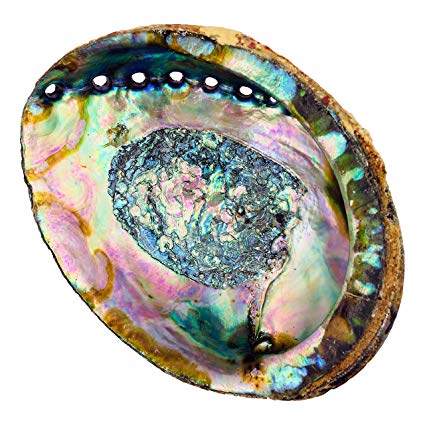
</div>

##### Attribute information:

   Given is the attribute name, attribute type, the measurement unit and a
   brief description.  The number of rings is the value to predict: either
   as a continuous value or as a classification problem.

	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years

In [139]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

ab_df = pd.read_csv('D:\\Machine Learning\\Data sets\\Abalone\\abalone.csv', names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

ab_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [33]:
ab_df.groupby('Sex')['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'].mean()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


In [75]:
features = ab_df.iloc[:,1:8]
pd.DataFrame(features)

scaler = StandardScaler()
X = scaler.fit_transform(features.values)
Y = ab_df['Sex']

# assigning SVC classifier to classify the sex genre
clf = SVC(kernel = 'linear')
clf.fit(X, Y)

print(clf.classes_)

features.head()

['F' 'I' 'M']


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [78]:
print(clf.predict([[0.555,0.335,0.045,0.4140,0.2345,0.1010,0.150]]))

print("Accuracy : ", accuracy_score(Y,clf.predict(X)))

['M']
Accuracy :  0.5554225520708642


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size = 0.2, random_state = 102)


clf.fit(X_train, y_train)

clf.predict(X_test)

print("Accuracy : ", accuracy_score(Y,clf.predict(X)))

Accuracy :  0.28225999521187456


Obs: Interstingly, the SVC classifier gives a very low accuracy score when we split the data in train and test sets.

In [138]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
Y = ab_df['Rings']

predict_age = sm.OLS(Y,X).fit()

predict_age.predict([0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150])

print("Accuracy : ", r2_score(Y,predict_age.predict(X)))

Accuracy :  -8.96724179404597


OLS performs very poorly for predicting the output in this case

In [148]:
l_reg = LinearRegression()
l_reg.fit(X,Y)

print("Accuracy : ", r2_score(Y,l_reg.predict(X)))

l_reg.predict([[0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150]])

Accuracy :  0.5276299399919839


array([11.77241092])

LinearRegression model slightly beter than individually applying OLS